# Question 1:
Use IRIS dataset from Sklearn and perform KNN. Compare with logistic regression.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets  import load_iris

# LOGISTICS REGRESSION PART

In [3]:
Iris=load_iris()

In [5]:
# print(Iris.DESCR)

In [8]:
Iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
Iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
Iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
data=pd.DataFrame(Iris.data,columns=Iris.feature_names)

In [13]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

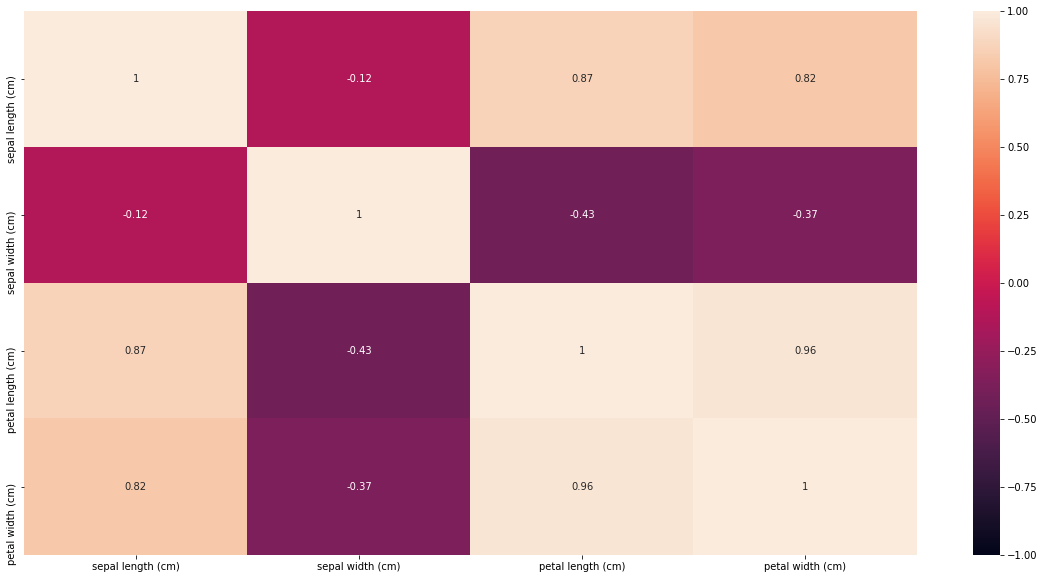

In [19]:
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [73]:
xtrain,xtest,ytrain,ytest=train_test_split(Iris.data,Iris.target,
                                           stratify=Iris.target,random_state=40,train_size=0.7)

In [74]:
Normal=StandardScaler()
xtrain=Normal.fit_transform(xtrain)
xtest=Normal.fit_transform(xtest)

In [75]:
log_regr=LogisticRegression()

In [76]:
log_regr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
predict=log_regr.predict(xtest)

In [78]:
accuracy=accuracy_score(ytest,predict)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9777777777777777


In [51]:
data_pre_test=pd.DataFrame({"Actuel_value":ytest,
                           "Predict_value":predict})

In [53]:
data_pre_test[data_pre_test['Actuel_value']!=data_pre_test['Predict_value']]

,Actuel_value,Predict_value
5,1,2


In [54]:
confusion_matix=confusion_matrix(ytest,predict)
print(confusion_matix)

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


# KNN PART

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
KNN=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [118]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [119]:
predicts=KNN.predict(xtest)

In [120]:
Accuracy=accuracy_score(ytest,predicts)
print(Accuracy)

0.9555555555555556


In [121]:
data_pre_test_k=pd.DataFrame({"Actuel_value":ytest,
                           "Predict_value":predicts})

In [122]:
data_pre_test_k[data_pre_test_k['Actuel_value']!=data_pre_test_k['Predict_value']]

,Actuel_value,Predict_value
20,1,2
40,2,1


In [123]:
Confudion_Metrix=confusion_matrix(ytest,predicts)
print(Confudion_Metrix)

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [124]:
print(f'Logistics regression accuraty : {accuracy}')
print('')
print(f'KNN accuraty : {Accuracy}')

Logistics regression accuraty : 0.9777777777777777

KNN accuraty : 0.9555555555555556


In [125]:
print(f'Logistics regr Confusion : \n{confusion_matix}')
print('')
print(f'KNN confusion metrix : \n{Confudion_Metrix}')

Logistics regr Confusion : 
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

KNN confusion metrix : 
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [126]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    Predicts=knn.predict(xtest)
    error.append(np.mean(ytest!=Predicts))

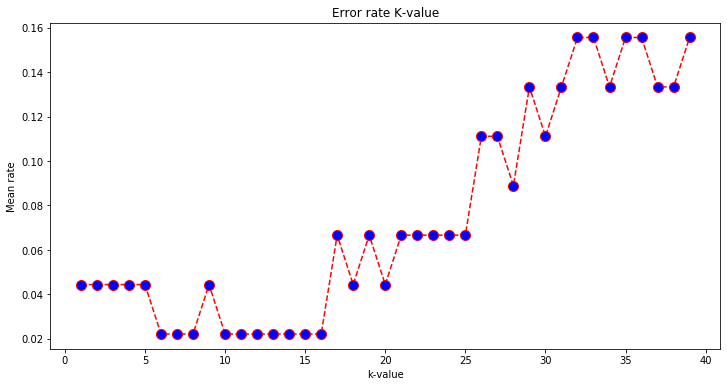

In [127]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error rate K-value')
plt.xlabel('k-value')
plt.ylabel('Mean rate')
plt.show()

## Here we can see that the accuracy of KNN is less than Logistics Regression with Iris datasets ,we can conclure that Logistics Algorithm (model) perform well than KNN with IRIS datasets. Let specify that we used k-value=5

In [128]:
confusion_matix.shape

(3, 3)